In [1]:
import os
import pyspedas
from pyspedas import mms_load_fpi,tinterpol
from pytplot import tplot, get_data, store_data, tlimit, options,tplot_names
from pyspedas.mms import fpi,fgm
from pyspedas.mms.mms_orbit_plot import mms_orbit_plot
from pyspedas.mms.particles.mms_part_slice2d import mms_part_slice2d
from pyspedas import time_string

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# trange = ['2020-06-17/21:00:00','2020-06-18/01:00:00']
# probe = ['1']


%matplotlib inline

In [12]:
# jet_candidate_timeranges =np.array([['2020-06-17/21:11:26.000','2020-06-17/21:11:48.000'], #1
# ['2020-06-17/21:16:34.799','2020-06-17/21:16:40.799'], #2
# ['2020-06-17/21:16:55.700','2020-06-17/21:17:06.700'], #3 
# ['2020-06-17/21:24:36.000','2020-06-17/21:25:20.000'], #4
# ['2020-06-17/21:29:10.000','2020-06-17/21:29:28.000'], #5
# ['2020-06-17/21:40:51.400','2020-06-17/21:41:20.799'],#6
# #['2020-06-17/22:15:34.000','2020-06-17/22:16:42.000'],#7 time range doesn't appear to be a jet
# #['2020-06-17/22:18:18.200','2020-06-17/22:18:31.000'],#8 doesn't really look like a jet
# ['2020-06-17/22:43:48.299','2020-06-17/22:44:03.599'],#9
# #['2020-06-17/22:46:25.500','2020-06-17/22:46:39.099'],#10 doens't really look like a jet
# ['2020-06-17/23:03:50.000','2020-06-17/23:03:58.000'],#11
# #['2020-06-17/23:08:35.700','2020-06-17/23:08:57.400'],#12
# ['2020-06-17/23:10:43.000','2020-06-17/23:11:22.000'],#13
# ['2020-06-17/23:17:17.299','2020-06-17/23:17:28.000'],#14
# ['2020-06-17/23:34:55.400','2020-06-17/23:35:17.500'],#15
# ['2020-06-17/23:36:57.000','2020-06-17/23:37:26.500'],#16
# ['2020-06-17/23:42:47.000','2020-06-17/23:42:59.000'],#17
# ['2020-06-17/23:49:27.000','2020-06-17/23:49:49.000'],#18
# ['2020-06-17/23:57:57.599','2020-06-17/23:58:30.599'],#19
# #2020-06-18/00:04:58.599','2020-06-18/00:05:11.099'],#20
# #['2020-06-18/00:09:41.000','2020-06-18/00:10:05.000'],#21
# ['2020-06-18/00:22:14.000','2020-06-18/00:22:35.599']])#22




# MAGNETOSPHERE reference time:['2020-06-17/21:08:00']


# MAGNETOSHEATH reference time: ['2020-06-17/22:01:30']



In [13]:
help(mms_part_slice2d)

Help on function mms_part_slice2d in module pyspedas.mms.particles.mms_part_slice2d:

mms_part_slice2d(trange=None, time=None, samples=None, window=None, center_time=False, erange=None, thetarange=None, zdirrange=None, average_angle=None, sum_angle=None, energy=False, log=False, probe='1', instrument='fpi', data_rate=None, level='l2', spdf=False, mag_data_rate=None, species=None, rotation='xy', custom_rotation=None, slice_x=None, slice_norm=None, subtract_bulk=False, xrange=None, yrange=None, zrange=None, resolution=None, interpolation='geometric', contours=False, title=None, smooth=None, save_jpeg=None, save_png=None, save_svg=None, save_pdf=None, save_eps=None, plotsize=10, dpi=None, return_slice=False, cmap=None, display=True)
    This routine creates 2D slices of 3D distribution function data from the FPI and HPCA instruments.
    This is essentially a wrapper around slice2d and slice2d_plot, that loads the data,
    any required support data, calculates the slice with slice2d and 

03-Feb-25 12:29:53: Loading pydata/mms1/fpi/brst/l2/dis-dist/2020/06/17/mms1_fpi_brst_l2_dis-dist_20200617211403_v3.4.0.cdf
03-Feb-25 12:29:53: Loading pydata/mms1/fpi/brst/l2/dis-dist/2020/06/17/mms1_fpi_brst_l2_dis-dist_20200617211633_v3.4.0.cdf
03-Feb-25 12:29:56: Time clip was applied to: mms1_dis_errorflags_brst
03-Feb-25 12:29:56: Time clip was applied to: mms1_dis_compressionloss_brst
03-Feb-25 12:29:56: Time clip was applied to: mms1_dis_steptable_parity_brst
03-Feb-25 12:29:56: Time clip was applied to: mms1_dis_startdelphi_count_brst
03-Feb-25 12:29:56: Time clip was applied to: mms1_dis_startdelphi_angle_brst
03-Feb-25 12:29:56: Time clip was applied to: mms1_dis_phi_brst
03-Feb-25 12:29:56: Time clip was applied to: mms1_dis_dist_brst
03-Feb-25 12:29:56: Time clip was applied to: mms1_dis_disterr_brst
03-Feb-25 12:29:56: Time clip was applied to: mms1_dis_avgf1counts_brst
03-Feb-25 12:29:56: Time clip was applied to: mms1_dis_steptimeoffsets_brst
03-Feb-25 12:29:56: Time cl

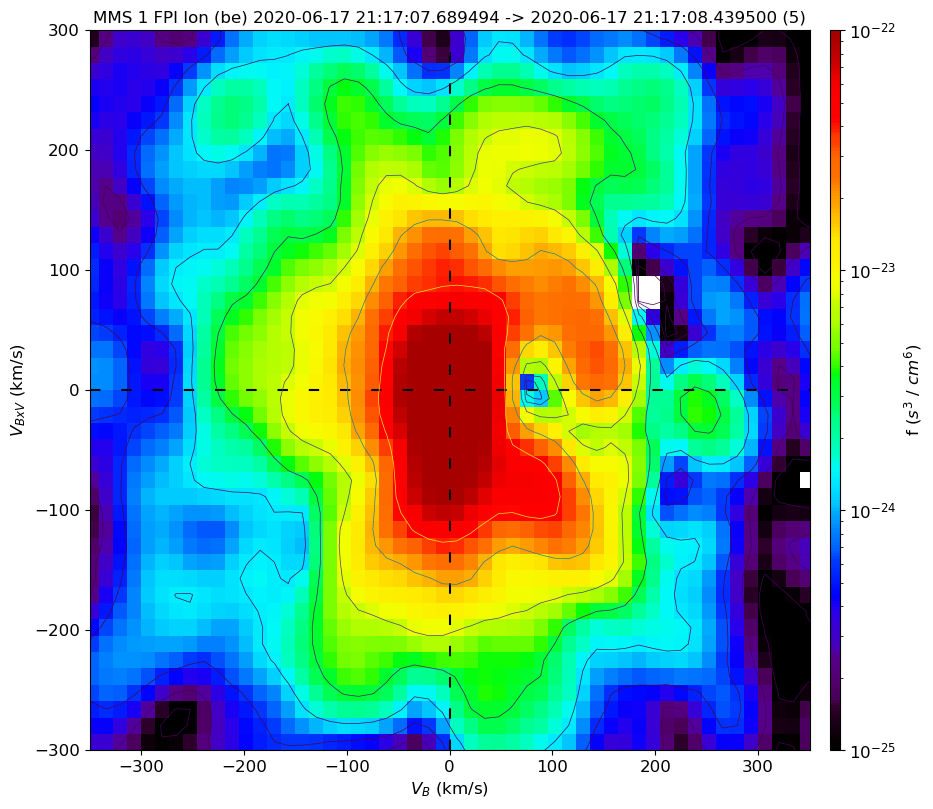

In [13]:


# peak_v_exhaust_times = ['2020-06-17/21:16:32','2020-06-17/21:17:01','2020-06-17/21:25:00\12020-06-17/21:29:14','2020-06-17/21:41:10',
#                        '2020-06-17/22:43:47','2020-06-17/22:46:35','2020-06-17/23:03:53','2020-06-17/23:08:46','2020-06-17/23:17:23',
#                        '2020-06-17/23:35:06','2020-06-17/23:37:07','2020-06-17/23:42:53','2020-06-17/23:49:40','2020-06-17/23:58:12',
#                        '2020-06-18/00:22:23']


#peak_v_exhaust_times = ['2020-06-17/21:16:45'] #3 MSH
#peak_v_exhaust_times = ['2020-06-17/21:17:10'] #3 MSP
#peak_v_exhaust_times = ['2020-06-17/21:17:01'] #3
#peak_v_exhaust_times = ['2020-06-17/21:25:01'] #4 [1e-25,5e-23]
#peak_v_exhaust_times = ['2020-06-17/21:41:10'] #6
#peak_v_exhaust_times = ['2020-06-17/22:18:24'] #8   zrange = [1e-25,1e-21]
#peak_v_exhaust_times = [] #9 # not clear where peak jet is- two converging jets, have to do 2 different VDFS
#peak_v_exhaust_times = ['2020-06-17/22:46:35'] #10 [1e-25,1e-22]
#peak_v_exhaust_times = ['2020-06-17/23:03:54.100'] #11 [1e-25,1e-22]
#peak_v_exhaust_times = ['2020-06-17/23:10:52'] #13[1e-25,1e-22]
#peak_v_exhaust_times = ['2020-06-17/23:17:22.900'] #14 [1e-25,1e-21]
#peak_v_exhaust_times = ['2020-06-17/23:35:08'] #15[1e-25,1e-22]
#peak_v_exhaust_times = ['2020-06-17/23:42:52.500'] #17[1e-25,5e-23]
#peak_v_exhaust_times = ['2020-06-17/23:49:41'] #18[1e-25,1e-22]
#peak_v_exhaust_times = ['2020-06-17/23:58:12'] #19 [1e-25,1e-22]
#peak_v_exhaust_times = ['2020-06-18/00:09:50'] #21 [1e-25,1e-22]
#peak_v_exhaust_times = ['2020-06-18/00:22:25'] #22[1e-25,1e-22]


# MSP_time = np.array([1592434705.0000000])
# MSP_time_string= np.array(time_string(MSP_time)).astype("datetime64[ns]")#MSP reference time
# peak_v_exhaust_times = ['2020-06-17/22:58:25.000000000'] #MSP


# MSH_time = np.array([1592439925.0000000])
# MSH_time_string= np.array(time_string(MSH_time)).astype("datetime64[ns]")#MSH reference time
# peak_v_exhaust_times = ['2020-06-18T00:25:25.000000000'] #MSH

# 
#MSH=['2020-06-17/21:16:48'] # event 3 MSH
# for t in MSH:
# for t in peak_v_exhaust_times:
#     for probe in range(1,5):

#         t_period_str = t
#         t_period_str = t_period_str.replace(":", "_")
#         t_period_str = t_period_str.replace("/", "_")
#         t_period_str = t_period_str.replace("T", "_")
#         t_period_str = t_period_str.replace("'", "_")
#         if len(t_period_str) > 19:
#             t_period_str = t_period_str[0:20]
            
#         name = 'ion_VDF_3'+str(probe)

#         # mms_part_slice2d(time=t,probe = probe,
#         #          instrument='fpi', species='i', data_rate = 'brst', mag_data_rate ='brst',
#         #          xrange = [-350,350], yrange = [-300,300], zrange = [1e-25,1e-22],
#         #          interpolation = '2d',resolution = 350,rotation='be',
#         #          save_png = name ,samples=5,subtract_bulk = False)
#         mms_part_slice2d(time=t,probe = probe,
#                  instrument='fpi', species='i', data_rate = 'brst', mag_data_rate ='brst',
#                  xrange = [-350,350], yrange = [-300,300], zrange = [1e-25,1e-21],
#                  interpolation = '2d',resolution = 350,rotation='be',samples=5,subtract_bulk = True)


# # event 3
# mms_part_slice2d(time='2020-06-17/21:17:01',probe = 1,
#          instrument='fpi', species='i', data_rate = 'brst', mag_data_rate ='brst',
#          xrange = [-350,350], yrange = [-300,300], zrange = [1e-25,1e-22],
#          interpolation = '2d',resolution = 350,rotation='be',samples=5,subtract_bulk = True)


#magnetosphere event 3
mms_part_slice2d(time='2020-06-17/21:17:08',probe = 1,
         instrument='fpi', species='i', data_rate = 'brst', mag_data_rate ='brst',
         xrange = [-350,350], yrange = [-300,300], zrange = [1e-25,1e-22],
         interpolation = '2d',resolution = 350,rotation='be',samples=5,subtract_bulk = True)


# # magnetosheath event 3
# mms_part_slice2d(time='2020-06-17/21:16:44',probe = 1,
#          instrument='fpi', species='i', data_rate = 'brst', mag_data_rate ='brst',
#          xrange = [-350,350], yrange = [-300,300], zrange = [1e-25,1e-22],
#          interpolation = '2d',resolution = 350,rotation='be',samples=5,subtract_bulk = True)



30-Jan-25 17:56:53: Loading pydata/mms1/fpi/brst/l2/dis-dist/2020/06/17/mms1_fpi_brst_l2_dis-dist_20200617211403_v3.4.0.cdf
30-Jan-25 17:56:53: Loading pydata/mms1/fpi/brst/l2/dis-dist/2020/06/17/mms1_fpi_brst_l2_dis-dist_20200617211633_v3.4.0.cdf
30-Jan-25 17:56:55: Time clip was applied to: mms1_dis_errorflags_brst
30-Jan-25 17:56:55: Time clip was applied to: mms1_dis_compressionloss_brst
30-Jan-25 17:56:55: Time clip was applied to: mms1_dis_steptable_parity_brst
30-Jan-25 17:56:55: Time clip was applied to: mms1_dis_startdelphi_count_brst
30-Jan-25 17:56:55: Time clip was applied to: mms1_dis_startdelphi_angle_brst
30-Jan-25 17:56:55: Time clip was applied to: mms1_dis_phi_brst
30-Jan-25 17:56:55: Time clip was applied to: mms1_dis_dist_brst
30-Jan-25 17:56:55: Time clip was applied to: mms1_dis_disterr_brst
30-Jan-25 17:56:55: Time clip was applied to: mms1_dis_avgf1counts_brst
30-Jan-25 17:56:55: Time clip was applied to: mms1_dis_steptimeoffsets_brst
30-Jan-25 17:56:55: Time cl

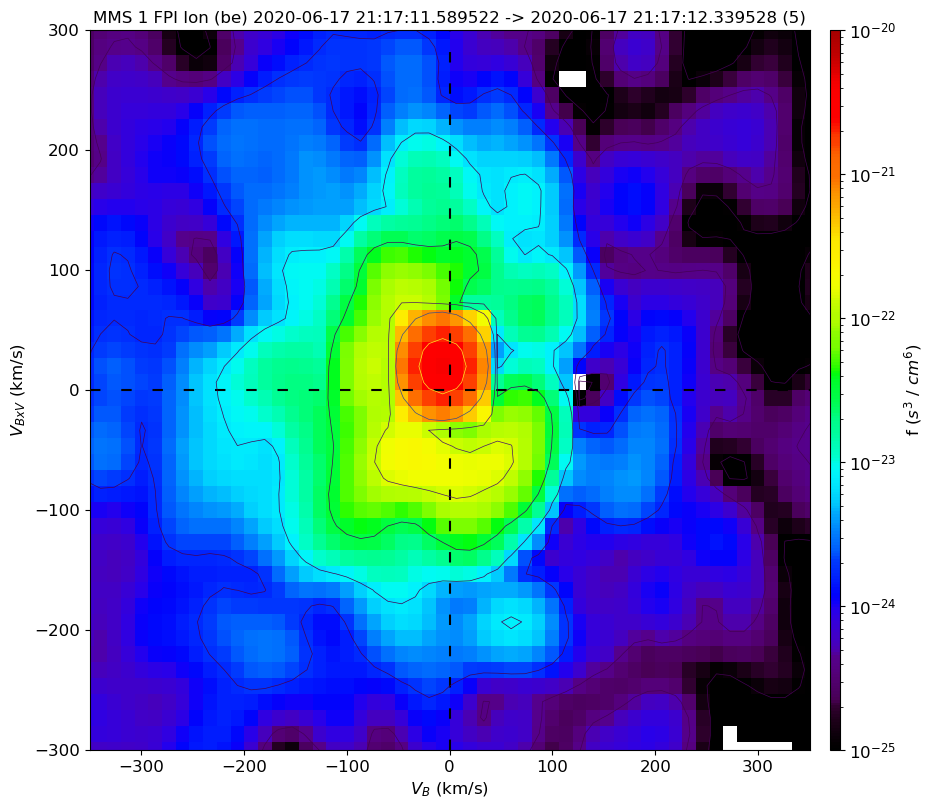

In [18]:
mms_part_slice2d(time='2020-06-17/21:17:12',probe = 1,
         instrument='fpi', species='i', data_rate = 'brst', mag_data_rate ='brst',
         xrange = [-350,350], yrange = [-300,300], zrange = [1e-25,1e-20],
         interpolation = '2d',resolution = 350,rotation='be',samples=5,subtract_bulk = False)

30-Jan-25 18:33:23: Loading pydata/mms2/fpi/brst/l2/dis-dist/2020/06/17/mms2_fpi_brst_l2_dis-dist_20200617211403_v3.4.0.cdf
30-Jan-25 18:33:23: Loading pydata/mms2/fpi/brst/l2/dis-dist/2020/06/17/mms2_fpi_brst_l2_dis-dist_20200617211633_v3.4.0.cdf
30-Jan-25 18:33:25: Time clip was applied to: mms2_dis_errorflags_brst
30-Jan-25 18:33:25: Time clip was applied to: mms2_dis_compressionloss_brst
30-Jan-25 18:33:25: Time clip was applied to: mms2_dis_steptable_parity_brst
30-Jan-25 18:33:25: Time clip was applied to: mms2_dis_startdelphi_count_brst
30-Jan-25 18:33:25: Time clip was applied to: mms2_dis_startdelphi_angle_brst
30-Jan-25 18:33:25: Time clip was applied to: mms2_dis_phi_brst
30-Jan-25 18:33:25: Time clip was applied to: mms2_dis_dist_brst
30-Jan-25 18:33:25: Time clip was applied to: mms2_dis_disterr_brst
30-Jan-25 18:33:25: Time clip was applied to: mms2_dis_avgf1counts_brst
30-Jan-25 18:33:26: Time clip was applied to: mms2_dis_steptimeoffsets_brst
30-Jan-25 18:33:26: Time cl

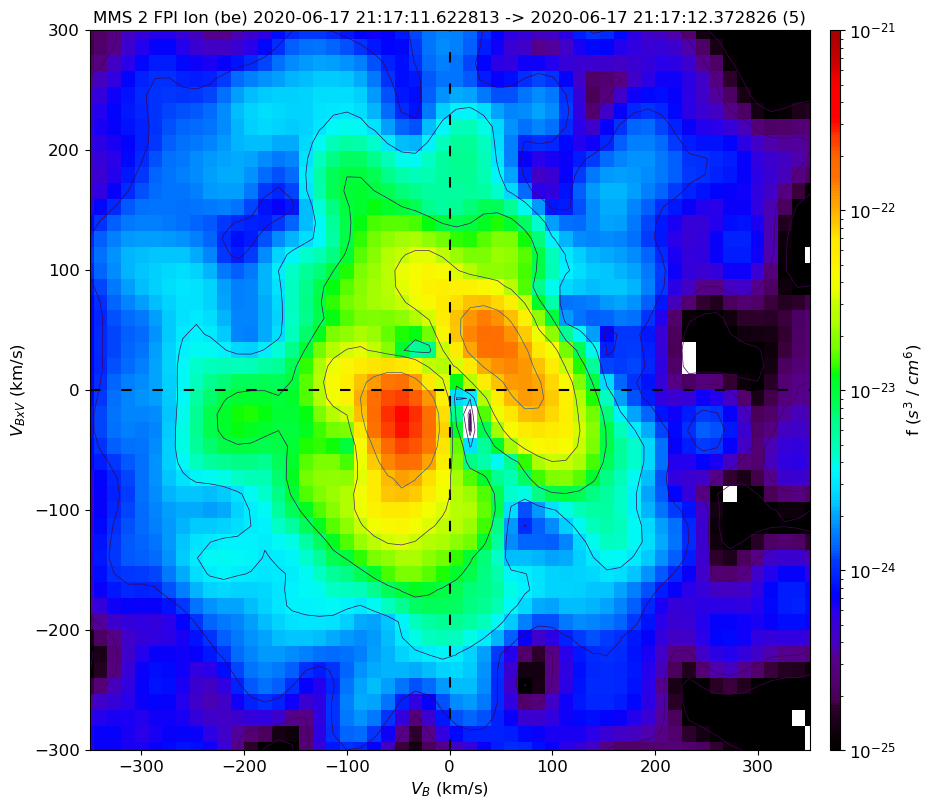

In [20]:
mms_part_slice2d(time='2020-06-17/21:17:12',probe = 2,
         instrument='fpi', species='i', data_rate = 'brst', mag_data_rate ='brst',
         xrange = [-350,350], yrange = [-300,300], zrange = [1e-25,1e-21],
         interpolation = '2d',resolution = 350,rotation='be',samples=5,subtract_bulk = False)

In [ ]:
peak_v_exhaust_times = ['2020-06-17/21:17:01'] #3

mms_part_slice2d(time='2020-06-17/21:17:01',probe = probe,
                 instrument='fpi', species='i', data_rate = 'brst', mag_data_rate ='brst',
                 xrange = [-350,350], yrange = [-300,300], zrange = [1e-25,1e-22],
                 interpolation = '1d',resolution = 350,rotation='be',
                 save_png = name ,samples=5,subtract_bulk = True)

In [24]:
MSH_time = np.array([1592439925.0000000])
MSH_time_string= np.array(time_string(MSH_time)).astype("datetime64[ns]")#MSH reference time
print(MSH_time_string)

['2020-06-18T00:25:25.000000000']


In [25]:
from pyspedas.mms.particles.mms_part_getspec import mms_part_getspec


In [17]:
help(mms_part_getspec)

Help on function mms_part_getspec in module pyspedas.mms.particles.mms_part_getspec:

mms_part_getspec(instrument='fpi', probe='1', species='e', data_rate='fast', trange=None, output=['energy', 'theta', 'phi', 'pa', 'gyro'], units='eflux', energy=None, phi=None, theta=None, pitch=None, gyro=None, mag_data_rate=None, scpot_data_rate=None, fac_type='mphigeo', center_measurement=False, spdf=False, correct_photoelectrons=False, internal_photoelectron_corrections=False, disable_photoelectron_corrections=False, zero_negative_values=False, regrid=[32, 16], no_regrid=False)
    Generate spectra and moments from 3D MMS particle data
    
    Parameters
    ----------
        trange: list of str
            Time range
    
        units: str
            Specify units of output variables; must be 'eflux' to calculate moments
    
            valid options:
            'flux'   -  # / (cm^2 * s * sr * eV)
            'eflux'  -  eV / (cm^2 * s * sr * eV)  <default>
            'df_cm'  -  s^3 / cm

In [18]:

jet_candidate_timeranges = np.array([['2020-06-17/21:16:25','2020-06-17/21:16:43']]) #2 # got it pretty good I think
#jet_candidate_timeranges = np.array([['2020-06-17/21:16:50','2020-06-17/21:17:10']]) #3 # got it pretty good I think
#jet_candidate_timeranges = np.array([['2020-06-17/21:24:34','2020-06-17/21:25:22.00']]) #4 # good looking event
#jet_candidate_timeranges = np.array([['2020-06-17/21:29:08.000','2020-06-17/21:29:20']]) #5# good looking event
#jet_candidate_timeranges = np.array([['2020-06-17/21:40:49','2020-06-17/21:41:23']]) #6 okay looking
#jet_candidate_timeranges =np.array([['2020-06-17/22:43:33.00','2020-06-17/22:44:05.00']]) #9 ehh
#jet_candidate_timeranges=np.array([['2020-06-17/22:46:24.000','2020-06-17/22:46:41.000']])#10 okay looking
#jet_candidate_timeranges =np.array([['2020-06-17/23:03:49.000','2020-06-17/23:03:59.000']]) #11 pretty good
#jet_candidate_timeranges = np.array([['2020-06-17/23:08:35.500','2020-06-17/23:08:59.000']])#12
# # # sugggestion to move the jet candidate event end from 2020-06-17/23:11:22.000 to 23:10:52
#jet_candidate_timeranges =np.array([['2020-06-17/23:10:42.000','2020-06-17/23:10:53.000']]) #13 okay, hard to see peak Vl
#jet_candidate_timeranges =np.array([['2020-06-17/23:17:16','2020-06-17/23:17:29.000']]) #14  pretty good
#jet_candidate_timeranges = np.array([['2020-06-17/23:34:54','2020-06-17/23:35:18']]) # 15 good
#jet_candidate_timeranges =np.array([['2020-06-17/23:36:56.000','2020-06-17/23:37:27.000']]) #16 good; well-defined peak
#jet_candidate_timeranges =np.array([['2020-06-17/23:42:45.000','2020-06-17/23:43:02.000']]) #17 VERY GOOD
#jet_candidate_timeranges = np.array([['2020-06-17/23:49:23.000','2020-06-17/23:49:49.000']]) #18 good; well-defined peak
#jet_candidate_timeranges =np.array([['2020-06-17/23:57:55','2020-06-17/23:58:27']]) #19 good
#jet_candidate_timeranges = np.array([['2020-06-18/00:22:08.000','2020-06-18/00:22:36']]) #22

In [19]:
i = 0
dtb = pd.Timedelta(hours = 0, minutes = 0, seconds = 2)

st1 = np.array(pd.to_datetime(jet_candidate_timeranges[i,0])-dtb)
end1 = np.array(pd.to_datetime(jet_candidate_timeranges[i,1])+dtb)
pb=['2']
trange = [str(st1),str(end1)]
print(st1)

mms_part_getspec(trange=trange, energy=[300, 600], instrument='fpi', probe=pb, species='e', data_rate='brst', output=['pa'])


2020-06-17 21:16:23


16-Jan-25 13:00:24: Loading pydata/mms2/fpi/brst/l2/des-dist/2020/06/17/mms2_fpi_brst_l2_des-dist_20200617211403_v3.4.0.cdf
16-Jan-25 13:00:24: Loading pydata/mms2/fpi/brst/l2/des-dist/2020/06/17/mms2_fpi_brst_l2_des-dist_20200617211633_v3.4.0.cdf
16-Jan-25 13:00:43: Time clip was applied to: mms2_des_errorflags_brst
16-Jan-25 13:00:43: Time clip was applied to: mms2_des_compressionloss_brst
16-Jan-25 13:00:43: Time clip was applied to: mms2_des_steptable_parity_brst
16-Jan-25 13:00:43: Time clip was applied to: mms2_des_startdelphi_count_brst
16-Jan-25 13:00:43: Time clip was applied to: mms2_des_startdelphi_angle_brst
16-Jan-25 13:00:43: Time clip was applied to: mms2_des_phi_brst
16-Jan-25 13:00:43: Time clip was applied to: mms2_des_dist_brst
16-Jan-25 13:00:43: Time clip was applied to: mms2_des_disterr_brst
16-Jan-25 13:00:43: Time clip was applied to: mms2_des_avgf1counts_brst
16-Jan-25 13:00:43: Time clip was applied to: mms2_des_steptimeoffsets_brst
16-Jan-25 13:00:43: Time cl

['mms2_des_dist_brst_pa']

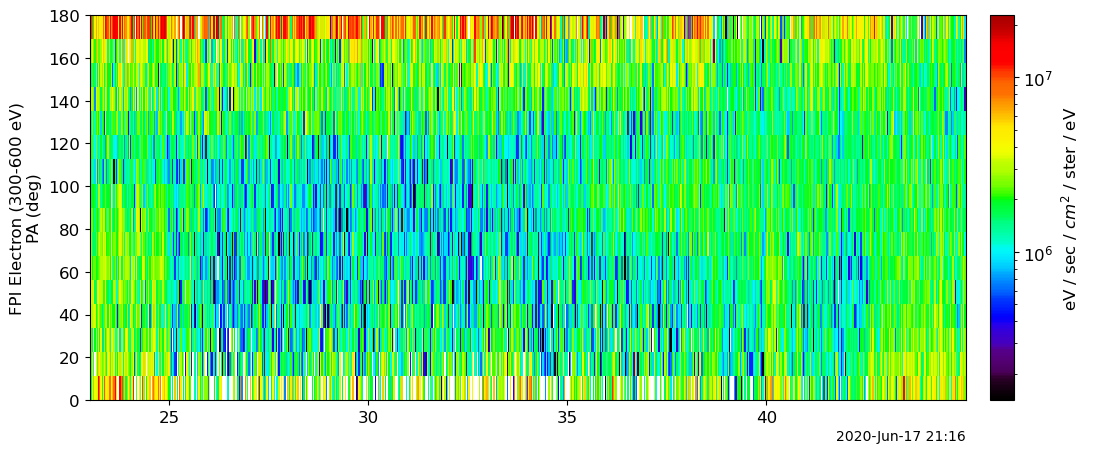

In [20]:
options('mms2_des_dist_brst_pa','ytitle', 'FPI Electron (300-600 eV)')



tplot(['mms2_des_dist_brst_pa'])


16-Jan-25 13:19:49: Loading pydata/mms4/fpi/brst/l2/dis-dist/2020/06/17/mms4_fpi_brst_l2_dis-dist_20200617230053_v3.4.0.cdf
16-Jan-25 13:19:49: Loading pydata/mms4/fpi/brst/l2/dis-dist/2020/06/17/mms4_fpi_brst_l2_dis-dist_20200617230323_v3.4.0.cdf
16-Jan-25 13:19:55: Time clip was applied to: mms4_dis_errorflags_brst
16-Jan-25 13:19:55: Time clip was applied to: mms4_dis_compressionloss_brst
16-Jan-25 13:19:55: Time clip was applied to: mms4_dis_steptable_parity_brst
16-Jan-25 13:19:55: Time clip was applied to: mms4_dis_startdelphi_count_brst
16-Jan-25 13:19:55: Time clip was applied to: mms4_dis_startdelphi_angle_brst
16-Jan-25 13:19:55: Time clip was applied to: mms4_dis_phi_brst
16-Jan-25 13:19:55: Time clip was applied to: mms4_dis_dist_brst
16-Jan-25 13:19:55: Time clip was applied to: mms4_dis_disterr_brst
16-Jan-25 13:19:55: Time clip was applied to: mms4_dis_avgf1counts_brst
16-Jan-25 13:19:55: Time clip was applied to: mms4_dis_steptimeoffsets_brst
16-Jan-25 13:19:55: Time cl

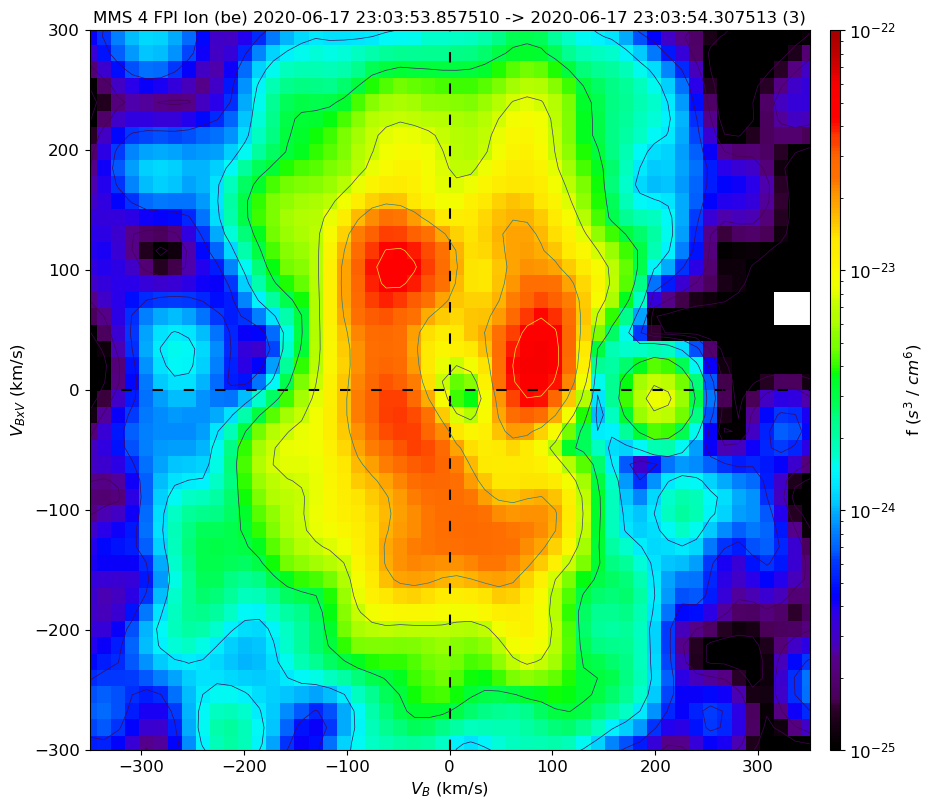

In [21]:
plt.rcParams.update({'font.size': 24})
probe='4'
name = 'ion_VDF_event_11_MMS_'+str(probe)

mms_part_slice2d(time='2020-06-17/23:03:54.100',probe = probe,
                 instrument='fpi', species='i', data_rate = 'brst', mag_data_rate ='brst',
                 xrange = [-350,350], yrange = [-300,300], zrange = [1e-25,1e-22],
                 interpolation = '2d',resolution = 350,rotation='be',
                 save_png = name ,samples=3,subtract_bulk = True)